# Viewing 3D Volumetric Data With Matplotlib

In [1]:
import matplotlib as mpl
%matplotlib notebook

<IPython.core.display.Javascript object>


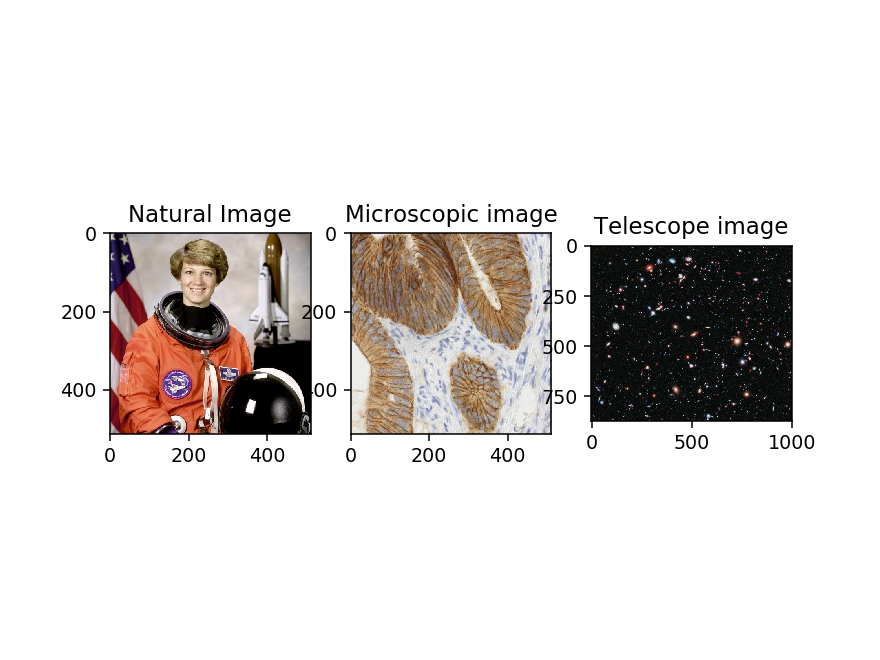

Text(0.5, 1.0, 'Telescope image')

In [3]:
import matplotlib.pyplot as plt
#load test data
from skimage import data

astronaut = data.astronaut()
ihc = data.immunohistochemistry()
hubble = data.hubble_deep_field()

#Initialize subplots - 3 in a row
fig, ax = plt.subplots(nrows=1, ncols=3)

# show image in each subplot
ax[0].imshow(astronaut)
ax[0].set_title('Natural Image')
ax[1].imshow(ihc)
ax[1].set_title('Microscopic image')
ax[2].imshow(hubble)
ax[2].set_title('Telescope image')

In [4]:
import tempfile
#create a temp directory
d = tempfile.mkdtemp()

In [5]:
import os
#return the tail of the path
os.path.basename('http://google.com/attention.zip')

'attention.zip'

In [6]:
from urllib.request import urlretrieve

# define URL
url = 'http://www.fil.ion.ucl.ac.uk/spm/download/data/attention/attention.zip'

# retrieve the data
fn, info = urlretrieve(url, os.path.join(d, 'attention.zip'))

In [7]:
import zipfile
#extract the contents into our temp d dir
zipfile.ZipFile(fn).extractall(path=d)

In [8]:
# list first 10 records
[f.filename for f in zipfile.ZipFile(fn).filelist[:10]]

['attention/',
 'attention/multi_block_regressors.mat',
 'attention/README_DATA.txt',
 'attention/factors.mat',
 'attention/functional/',
 'attention/functional/snffM00587_0201.hdr',
 'attention/functional/snffM00587_0040.img',
 'attention/functional/snffM00587_0458.hdr',
 'attention/functional/snffM00587_0185.img',
 'attention/functional/snffM00587_0018.hdr']

In [9]:
import nibabel # NIfTI format file reader

# Read the images
struct = nibabel.load(os.path.join(d, 'attention/functional/snffM00587_0201.hdr'))

# get a plain numpy array
struct_arr = struct.get_data()

In [10]:
# to directly plot the MRI (magnetic resonance imaging) data
#from skimage import io
#struct_arr = io.imread("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/attention-mri.tif")

<IPython.core.display.Javascript object>


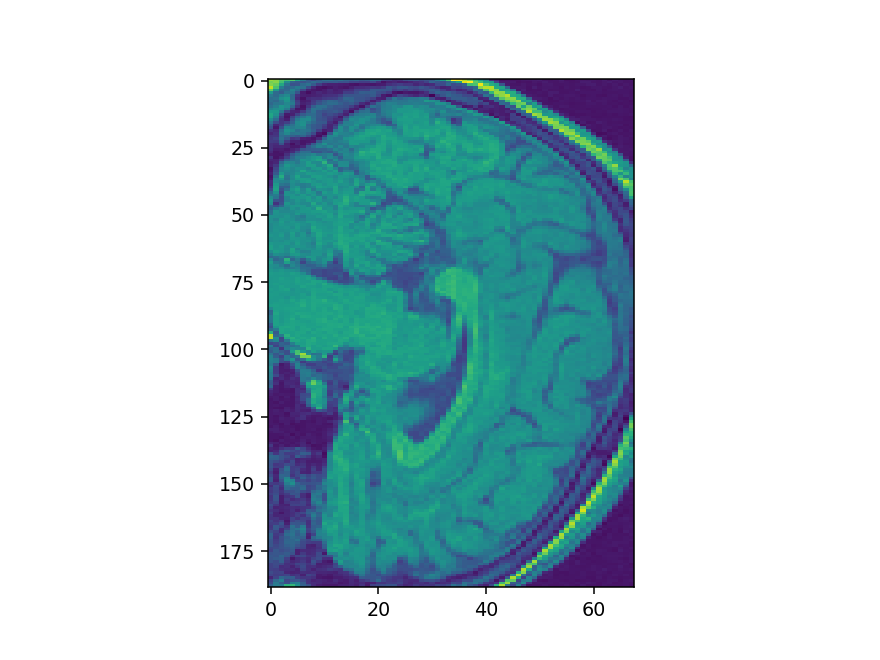

In [14]:
plt.imshow(struct_arr[75], aspect=0.5)

<IPython.core.display.Javascript object>


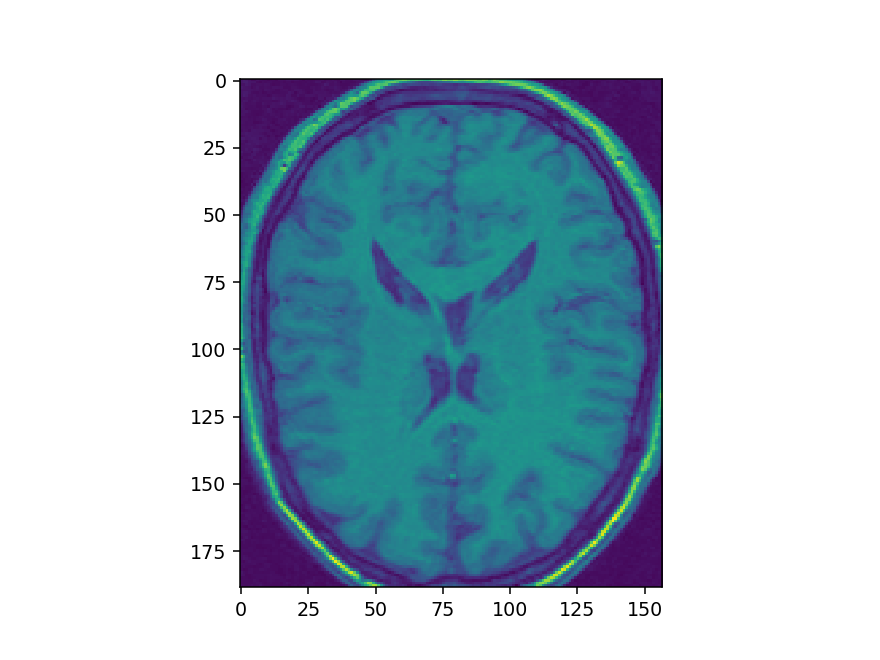

In [15]:
struct_arr2 = struct_arr.T
plt.imshow(struct_arr2[34])

<IPython.core.display.Javascript object>


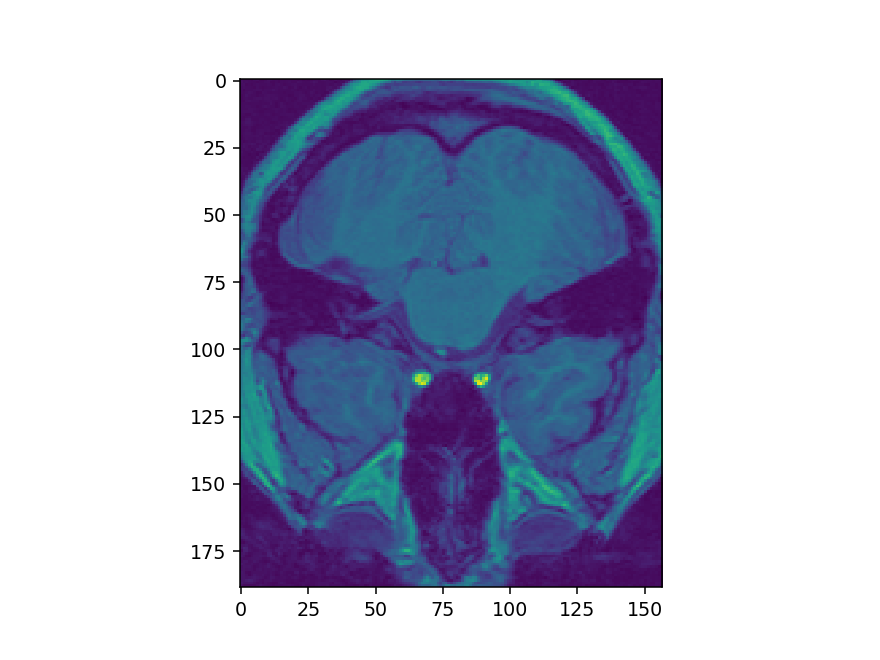

In [17]:
plt.imshow(struct_arr2[5])

In [26]:
# tell the figure that it should use the process_key function to process keyboard presses
def multi_slice_viewer(volume):
    #remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

#let’s bind the J and K keys on the keyboard to “previous slice” and “next slice”
def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

<IPython.core.display.Javascript object>


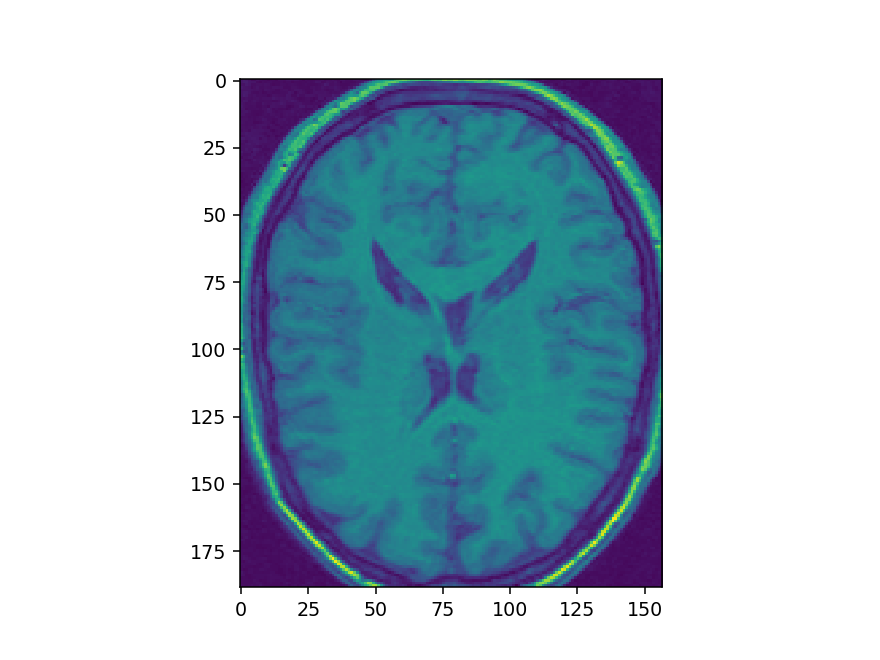

In [27]:
multi_slice_viewer(struct_arr2)

In [28]:
# final clean up
import shutil

# remove d temp dir
shutil.rmtree(d)